# ML-Hackathon-Innomatics


This is a submission for a hackthon organized by Innomatics for their Internship program. In this submission, the following activity will be performed.

1.The dataset will be cleaned and formatted.It includes detecting missing values and outliers and treating them. 

2.After the appropriate transformation the dataset will be analysed and the insights gained will be presented.

3.Steps like Hyperparameter tuning and Feature engineering will be used to geerate better variables and a better predictive output.

4.Models will be tested and the one with the best performance metrics will be used to build the algorithm. 

5.Final step would be obviously building the algorithm which would take an input value and return an output value. 

**Step 1: Setting up the environment**

First of all, we need to set up the environment before we can start the work. First of all the necessary packages will be loaded as they are not pre-existing. The dataset will later be imported and viewed. 

In [1]:
#importing the packages
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, balanced_accuracy_score, confusion_matrix, f1_score, precision_score, average_precision_score, roc_auc_score,  recall_score,  precision_recall_curve as skm
from sklearn.tree import DecisionTreeRegressor

In [2]:
#obtaining the dataset
data=pd.read_excel("C:\\Users\\sujoydutta\\Desktop\\Data analysis\\Datasets\\Regression\\dataframe_.xlsx")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [3]:
#viewing the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [4]:
#examining the dataset
data.shape

(1697, 2)

**Step 2: Data cleaning and organizing**

In this step, we are going to be "cleaning" the data. We are going to remove the unnecessary columns and deal with missing values. We will also remove outliers in the dataset and make the data fit for analysis.

In [5]:
#checking null values
data.isna().sum(axis=0)

input     1
output    1
dtype: int64

In [6]:
#dropping the null values
data = data.dropna(subset=['input', 'output'], how='all')

<AxesSubplot: >

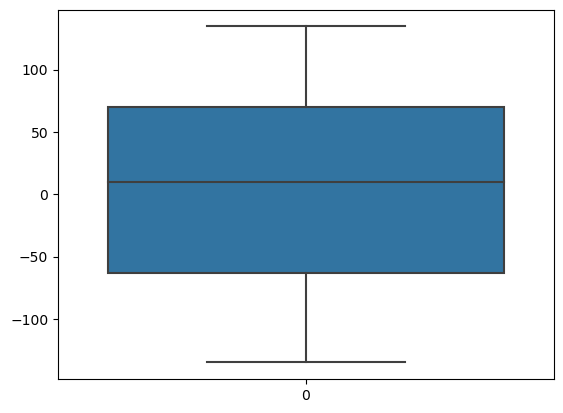

In [7]:
#spotting outliers using boxplot in input
sb.boxplot(data.input)


<AxesSubplot: >

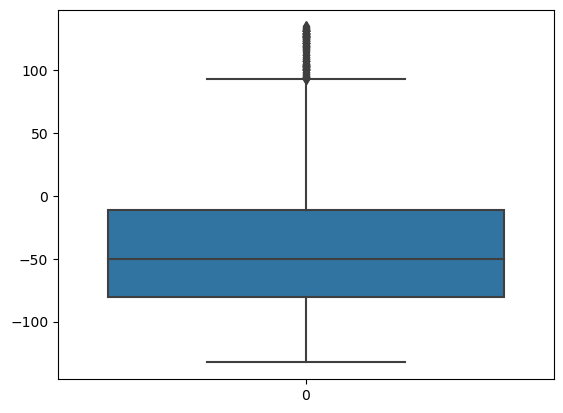

In [8]:
#spotting outliers using boxplot in output
sb.boxplot(data.output)


In [9]:
#outlier treatment for variable output
data.output.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10    -99.386909
0.25    -80.026767
0.50    -50.470981
0.70    -25.876783
0.90     84.642175
0.95    112.652706
0.99    131.000000
Name: output, dtype: float64

In [10]:
#setting outlier limits
output_out_HE=data[data.output > 20].copy()

In [11]:
#seeing length of outliers
print(len(output_out_HE))

330


In [12]:
#removing outliers
for x in data.output:
    if x > 20:
        data.output.replace(x,np.nan,inplace=True)

<AxesSubplot: >

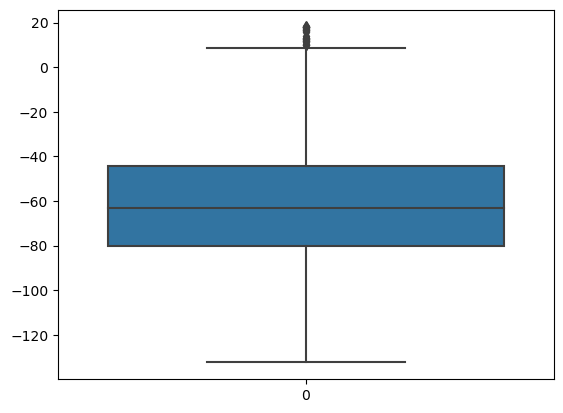

In [17]:
#checking if outliers gone 
sb.boxplot(data.output)

In [14]:
#getting median value of output
med_output= data.output.astype("float").median(axis=0)
print(med_output)

-62.95674265


In [16]:
#replacing nan values with median 
data.output.replace(np.nan, med_output, inplace=True)

**Step 3: Exploratory Data analysis**

Here we are going to know about our data.

In [21]:
#getting summary statisitics
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-62.218906
std,79.005970,29.091612
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-62.956743
75%,70.264109,-44.142811
max,134.605775,18.281270


In [23]:
#correlation of input and output
corr_coef= data.corr()
corr_coef

,input,output
input,1.000000,0.273953
output,0.273953,1.000000


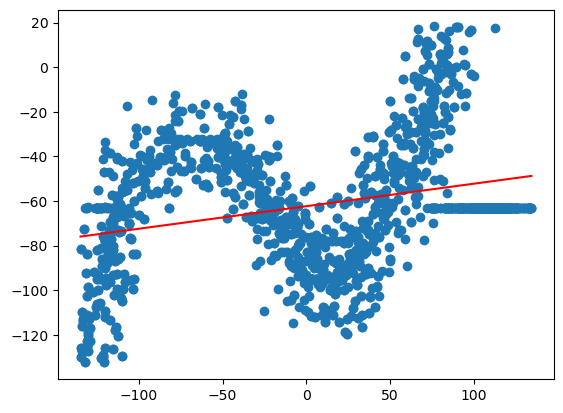

In [25]:
# plotting the data

#setting labels
x=data.input
y=data.output


 
#plotting the line graph
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')

**Insights Gathered**

The following insights were gathered from the dataset:
1.The average input has a very higher value than than the average utput, which means that we need to put a lot of input to get very little output.

2.There is little to moderate (0.27) positive correlation between input and output values. 

3.From the graph we can understand that there is a positive linear relationship between input and output.However the points are scattered which tells us that the relationship is not strong. 

**Step 4: Model building**

We will use machine learning techniques to build our model and select the most appropriate model for building the algorithm. 

In [27]:
#segregating Dataset
X= pd.DataFrame(data.iloc[:,-2].values)
y= pd.DataFrame(data.iloc[:,-1].values)
print(X)
print(y)

               0
0    -122.740667
1    -121.531419
2    -134.917019
3    -120.605951
4    -129.894781
...          ...
1691   25.410184
1692   29.537304
1693   31.633331
1694   29.091458
1695   17.145296

[1696 rows x 1 columns]
               0
0    -130.572085
1    -129.938929
2    -130.141832
3    -125.760932
4    -112.785214
...          ...
1691  -76.380902
1692  -82.796934
1693  -87.000000
1694 -104.943052
1695 -101.726894

[1696 rows x 1 columns]


In [74]:
#feature engineering to polynomial transform input
PR=PolynomialFeatures(degree=10)
xpoly=PR.fit_transform(X)
xpoly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
         5.15119325e+16, -6.32260898e+18,  7.76041246e+20],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         4.75892172e+16, -5.78358512e+18,  7.02887309e+20],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         1.09782697e+17, -1.48115542e+19,  1.99833074e+21],
       ...,
       [ 1.00000000e+00,  3.16333313e+01,  1.00066765e+03, ...,
         1.00267327e+12,  3.17178958e+13,  1.00334271e+15],
       [ 1.00000000e+00,  2.90914577e+01,  8.46312913e+02, ...,
         5.13007683e+11,  1.49241413e+13,  4.34165026e+14],
       [ 1.00000000e+00,  1.71452960e+01,  2.93961173e+02, ...,
         7.46723618e+09,  1.28027974e+11,  2.19507751e+12]])

In [75]:
#linear regression model and fitting
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [76]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

[-62.3359143]
[[0.10087527]]


In [77]:
#fitting 
lr1=LinearRegression()
lr1.fit(xpoly,y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

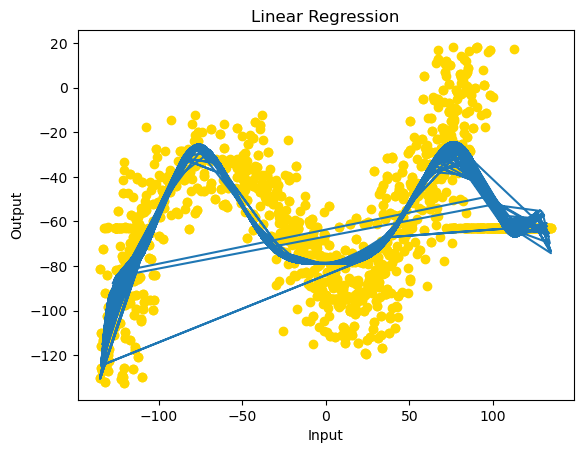

In [78]:
#seeing linear results
plt.scatter(X,y, color="gold")
plt.plot(X,lr1.predict(PR.fit_transform(X)))
plt.title("Linear Regression")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show

In [79]:
#checking model 1
y_poly_pred1 = lr1.predict(xpoly)
rmse1 = np.sqrt(mean_squared_error(y,y_poly_pred1))
r21 = r2_score(y,y_poly_pred1)
print(rmse1)
print(r21)

20.26177292577733
0.5146271632459762


In [67]:
#after tuning the hyperparameter a bit 
PR=PolynomialFeatures(degree=14)
xpoly=PR.fit_transform(X)
xpoly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04, ...,
         1.16912720e+25, -1.43499453e+27,  1.76132186e+29],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04, ...,
         1.03815654e+25, -1.26168637e+27,  1.53334536e+29],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04, ...,
         3.63748191e+25, -4.90758216e+27,  6.62116356e+29],
       ...,
       [ 1.00000000e+00,  3.16333313e+01,  1.00066765e+03, ...,
         1.00401259e+18,  3.17602628e+19,  1.00468292e+21],
       [ 1.00000000e+00,  2.90914577e+01,  8.46312913e+02, ...,
         3.67439468e+17,  1.06893498e+19,  3.10968767e+20],
       [ 1.00000000e+00,  1.71452960e+01,  2.93961173e+02, ...,
         6.45267560e+14,  1.10633033e+16,  1.89683609e+17]])

In [68]:
#linear regression model and fitting
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [69]:
#print co ef and intercept
print(lm.intercept_)
print(lm.coef_)

[-62.3359143]
[[0.10087527]]


In [70]:
#fitting 
lr2=LinearRegression()
lr2.fit(xpoly,y)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

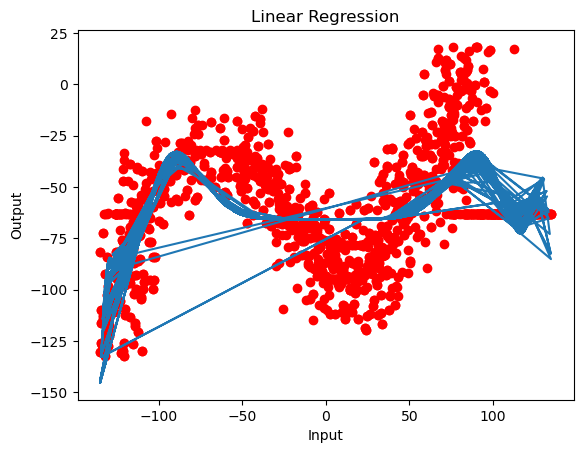

In [71]:
#seeing linear results
plt.scatter(X,y, color="red")
plt.plot(X,lr.predict(PR.fit_transform(X)))
plt.title("Linear Regression")
plt.xlabel("Input")
plt.ylabel("Output")
plt.show

In [73]:
#checking model 2
y_poly_pred2 = lr2.predict(xpoly)
rmse2 = np.sqrt(mean_squared_error(y,y_poly_pred2))
r22 = r2_score(y,y_poly_pred2)
print(rmse2)
print(r22)

24.148060167093842
0.31057809408747805


**Model selected**

The model is using polynomial transformed input variable as X which has been done by feature engineering. The second model tuned this hyperparameter a bit and used 14. 
We only used linear regresssion model as it is the most appropriate in case of single input variable.Model lr1 is chosen as it has lower rmse and hence lower error rate and will be used for making the algorithm.


**Step 5: Making a basic algorithm**

Here we are going to make a basic algorithm that will take input from the users and give output. 

In [80]:
#predicting the output using input
input_taker=int(input("please put the input"))
inputpred=lr1.predict(PR.fit_transform([[input_taker]])).round()
print('The output of a person with input {0} is {1}'.format(input_taker,inputpred))

please put the input34
The output of a person with input 34 is [[-71.]]
